# Intrusion Detection using Adaboost and LightGBM

## Nitin Vankadari

##### Importing the basic libraries needed

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataset

In [2]:
dataset=pd.read_csv("Train_Test_Linux_disk.csv")

In [3]:
dataset.head()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1556129666,2167,108.0,0.0,0.0,0,gvfs-afc-volum,1,dos
1,1556129791,2044,0.0,0.0,0.0,0,at-spi2-regist,1,dos
2,1556129831,2234,0.0,0.0,0.0,0,gsd-smartcard,1,dos
3,1556129861,2257,0.0,0.0,0.0,0,gsd-sound,1,dos
4,1556129871,2259,0.0,0.0,0.0,0,gsd-a11y-setti,1,dos


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160112 entries, 0 to 160111
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      160112 non-null  int64  
 1   PID     160112 non-null  int64  
 2   RDDSK   160112 non-null  float64
 3   WRDSK   160112 non-null  float64
 4   WCANCL  160112 non-null  float64
 5   DSK     160112 non-null  int64  
 6   CMD     160112 non-null  object 
 7   label   160112 non-null  int64  
 8   type    160112 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 11.0+ MB


##### 3 Float data types
##### 4 Integer data types
##### 2 object data types

##### Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5bf9e4f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5bfa04e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5bf9eef08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5bfa0fe88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5bfa14fc8>],
 'means': []}

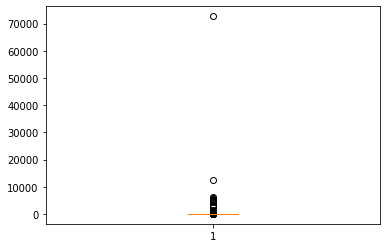

In [5]:
plt.boxplot(dataset.WCANCL)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5bfab7808>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5bfab7f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5bfab2d88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5bfabbfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5bfabfe48>],
 'means': []}

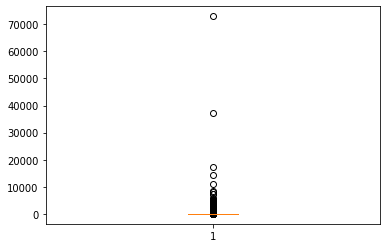

In [6]:
plt.boxplot(dataset.WRDSK)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5bfb2dac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5bfb30a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5bfb25fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5bfb34b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5bfb34c08>],
 'means': []}

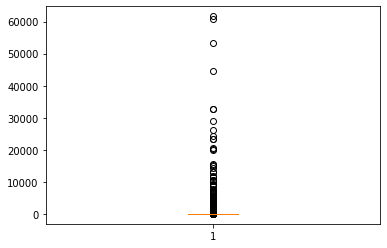

In [7]:
plt.boxplot(dataset.RDDSK)

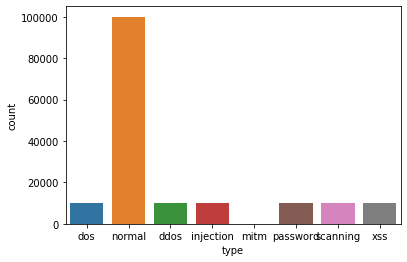

In [8]:
sns.countplot(dataset.type)

##### In the target variable most of the values are normal and the others are almost same in number

In [9]:
dataset.describe()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,label
count,1.601120e+05,160112.000000,160112.000000,160112.000000,160112.000000,160112.000000,160112.000000
mean,1.556534e+09,4422.386698,6.291612,7.370115,0.950859,0.285094,0.375437
std,3.065965e+05,3603.138417,375.296238,241.341085,189.347307,3.653392,0.484237
min,1.554219e+09,1007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.556262e+09,2123.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.556562e+09,2938.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.556762e+09,4075.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.556962e+09,16163.000000,61660.000000,72968.000000,72676.000000,100.000000,1.000000


In [10]:
dataset.isnull().sum()

ts        0
PID       0
RDDSK     0
WRDSK     0
WCANCL    0
DSK       0
CMD       0
label     0
type      0
dtype: int64

##### There are no null items in our dataset so there is no need to do something to impute them

##### Information regarding the features of the dataset

In [11]:
dataset['type'].value_counts()

normal       100000
dos           10000
xss           10000
password      10000
injection     10000
ddos          10000
scanning      10000
mitm            112
Name: type, dtype: int64

##### There are 8 types of attacks in our target variable/feature.

In [12]:
dataset['CMD'].value_counts()

apache2           34637
atop              19601
vmtoolsd           8432
vsftpd             5683
<vsftpd>           4840
                  ...  
updatedb.mloca        1
<date>                1
<StyleThread#>        1
kworker/5:8-cg        1
kworker/2:1-cg        1
Name: CMD, Length: 409, dtype: int64

In [13]:
dataset.drop('ts',1,inplace=True)

##### Performing label encoding on the object data types and converting to numerical data types

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['_CMD_'] = le.fit_transform(dataset.CMD)
dataset['_Type_'] = le.fit_transform(dataset.type)
dataset.drop(['CMD','type'], axis=1, inplace=True)

In [15]:
dataset.head()

,PID,RDDSK,WRDSK,WCANCL,DSK,label,_CMD_,_Type_
0,2167,108.0,0.0,0.0,0,1,207,1
1,2044,0.0,0.0,0.0,0,1,135,1
2,2234,0.0,0.0,0.0,0,1,203,1
3,2257,0.0,0.0,0.0,0,1,204,1
4,2259,0.0,0.0,0.0,0,1,188,1


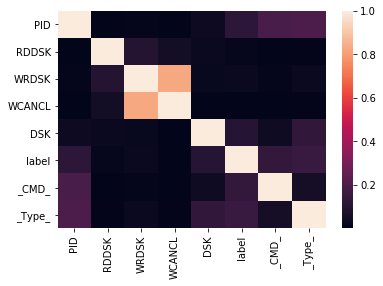

In [16]:
sns.heatmap(dataset.corr().apply(abs))

##### With the help of the heatmap we can understand how many cols are correlated, in our dataset there is less correlation therefore we can say that there are no redundant cols

In [17]:
from sklearn.preprocessing import Normalizer
n_scalar = Normalizer()
xdata = dataset.iloc[:,:-1]
x = n_scalar.fit_transform(dataset.drop('_Type_',1))

##### We are getting the range of the values between 0 and 1 with the help of the above normalization technique.

In [18]:
y = dataset['_Type_']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: _Type_, dtype: int32

In [19]:
import imblearn
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# ru = RandomUnderSampler()`
ro=RandomOverSampler()
# Xres, yres = ru.fit_sample(data,y)
Xro,yro=ro.fit_sample(x,y)

##### With the help of the random over sampler we are making all the classes in our target col equal i.e to 1 lakh

In [20]:
yro.value_counts()

7    100000
6    100000
5    100000
4    100000
3    100000
2    100000
1    100000
0    100000
Name: _Type_, dtype: int64

In [21]:
from sklearn import model_selection
X_train, X_test, y_train, y_test= model_selection.train_test_split(Xro, yro, test_size = 0.3, stratify = yro)

##### Splitting the dataset into training and testing sets. We have taken the test size to be 30%

##### Performing Kfold and  Stratified Kfold for Cross Validation

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4300083333333333

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
model = AdaBoostClassifier(random_state=42)
def evaluate_model(model):
    K_Fold = KFold(n_splits=10)
    score_of_kfold = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=K_Fold, n_jobs=-1, verbose = 1, error_score='raise')
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
    score_of_stratified = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 1, error_score='raise')
    list_of_scores = [mean(score_of_kfold),mean(score_of_stratified)]
    return list_of_scores
final_scores = (evaluate_model(model))

In [21]:
final_scores

[0.42991250000000003, 0.4299196428571429]

In [22]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report
get_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
4,1.000000,1.000000,1.000000,30000.000000
0,0.753815,0.973200,0.849573,30000.000000
accuracy,0.431333,0.431333,0.431333,0.431333
macro avg,0.485243,0.431333,0.377873,240000.000000
weighted avg,0.485243,0.431333,0.377873,240000.000000
1,0.845513,0.209800,0.336182,30000.000000
2,0.193050,0.864367,0.315610,30000.000000
6,0.339663,0.276667,0.304945,30000.000000
3,0.749901,0.126633,0.216677,30000.000000
5,0.000000,0.000000,0.000000,30000.000000


In [23]:
from sklearn.metrics import confusion_matrix
confmetric = confusion_matrix(y_test,y_pred)

In [24]:
confmetric

array([[29196,     0,     0,   733,     0,     0,    71,     0],
       [    0,  6294, 22821,     0,     0,     0,   885,     0],
       [    0,   172, 25931,     9,     0,     0,  3888,     0],
       [ 2997,     0, 23204,  3799,     0,     0,     0,     0],
       [    0,     0,     0,     0, 30000,     0,     0,     0],
       [    0,    16, 25860,     9,     0,     0,  4115,     0],
       [ 6538,   639, 14023,   500,     0,     0,  8300,     0],
       [    0,   323, 22484,    16,     0,     0,  7177,     0]],
      dtype=int64)

In [26]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9883208333333333

In [53]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from lightgbm import LGBMClassifier
from numpy import mean
model = LGBMClassifier(random_state=42)
def evaluate_model(model):
    K_Fold = KFold(n_splits=10)
    score_of_kfold = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=K_Fold, n_jobs=-1, verbose = 1, error_score='raise')
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
    score_of_stratified = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 1, error_score='raise')
    list_of_scores = [mean(score_of_kfold),mean(score_of_stratified)]
    return list_of_scores
final_scores = (evaluate_model(model))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  6.6min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.5min finished


In [54]:
final_scores

[0.9889214285714285, 0.9886410714285715]

In [55]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report
get_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
4,1.000000,1.000000,1.000000,30000.000000
0,0.999867,0.999933,0.999900,30000.000000
3,0.992392,1.000000,0.996181,30000.000000
5,0.994253,0.986133,0.990177,30000.000000
weighted avg,0.989354,0.989308,0.989315,240000.000000
macro avg,0.989354,0.989308,0.989315,240000.000000
accuracy,0.989308,0.989308,0.989308,0.989308
6,0.987116,0.985800,0.986458,30000.000000
1,0.989589,0.979067,0.984300,30000.000000
7,0.984363,0.979933,0.982143,30000.000000


In [28]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confmetric = confusion_matrix(y_test,y_pred)
confmetric

array([[29995,     0,     0,     0,     0,     0,     5,     0],
       [    0, 29413,   454,    10,     0,    16,    49,    58],
       [    0,   118, 29551,   151,     0,    29,    23,   128],
       [    0,   295,     0, 29705,     0,     0,     0,     0],
       [    0,     0,     0,     0, 30000,     0,     0,     0],
       [    0,    30,    37,    10,     0, 29523,   336,    64],
       [    0,    99,    66,    22,     0,    48, 29578,   187],
       [    0,    19,   437,     7,     0,    31,    74, 29432]],
      dtype=int64)

In [21]:
model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [26]:
params = {'AB':{'learning_rate': [0.05, 0.1, 0.2, 0.5], 'n_estimators': range(50,501,100)},'LGBM':{'max_depth':range(3,10,2), 'n_estimators': range(50,201,50),'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2],'subsample':[0.5,0.7,0.9],'num_leaves': range(15,51,10)}}

##### Performing Grid Search CV for hyperparameter tuning using the various combinations of the above mentioned parameters

In [27]:
from sklearn.model_selection import GridSearchCV
best_params = params
names= list()
models = {'AB':AdaBoostClassifier(random_state=42),'LGBM':LGBMClassifier(random_state=42)}
for name, param_grid, model in zip(params.keys(), params.values(), models.values()):
    gscv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=4)
    gscv.fit(X_train,y_train)
    names.append(name)
    best_params[name] = gscv.best_params_
    print(name)
    print("best score:",gscv.best_score_)
    print("best params:",gscv.best_params_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 102.9min finished


AB
best score: 0.43306607142857145
best params: {'learning_rate': 0.5, 'n_estimators': 250}
Fitting 4 folds for each of 960 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 152.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 306.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 416.7min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 631.5min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 792.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 1023.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 1300.0min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 1591.8min finished


LGBM
best score: 0.9926607142857142
best params: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 45, 'subsample': 0.5}


In [22]:
params = {'AB':{'learning_rate': [0.0001, 0.1, 1.0], 'n_estimators':(10,50,100)}}

In [23]:
from sklearn.model_selection import GridSearchCV
best_params = params
names= list()
models = {'AB':AdaBoostClassifier(random_state=42)}
for name, param_grid, model in zip(params.keys(), params.values(), models.values()):
    gscv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=4)
    gscv.fit(X_train,y_train)
    names.append(name)
    best_params[name] = gscv.best_params_
    print(name)
    print("best score:",gscv.best_score_)
    print("best params:",gscv.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  34 out of  36 | elapsed: 32.1min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 32.4min finished


AB
best score: 0.4558285714285714
best params: {'learning_rate': 1.0, 'n_estimators': 100}


In [23]:
params = {'AB':{'learning_rate': [0.001, 0.5, 2.0], 'n_estimators':(200,300,400)}}

In [24]:
from sklearn.model_selection import GridSearchCV
best_params = params
names= list()
models = {'AB':AdaBoostClassifier(random_state=42)}
for name, param_grid, model in zip(params.keys(), params.values(), models.values()):
    gscv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=4)
    gscv.fit(X_train,y_train)
    names.append(name)
    best_params[name] = gscv.best_params_
    print(name)
    print("best score:",gscv.best_score_)
    print("best params:",gscv.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done  34 out of  36 | elapsed: 66.2min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 66.3min finished


AB
best score: 0.4535517857142857
best params: {'learning_rate': 2.0, 'n_estimators': 400}


In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9267583333333334

In [23]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report
get_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
4,1.000000,1.000000,1.000000,30000.000000
0,0.999467,0.999467,0.999467,30000.000000
accuracy,0.926758,0.926758,0.926758,0.926758
macro avg,0.928758,0.926758,0.926724,240000.000000
weighted avg,0.928758,0.926758,0.926724,240000.000000
6,0.952455,0.900800,0.925908,30000.000000
5,0.891621,0.947467,0.918696,30000.000000
1,0.922137,0.883100,0.902196,30000.000000
3,0.846331,0.954267,0.897064,30000.000000
7,0.940842,0.837600,0.886224,30000.000000


In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confmetric = confusion_matrix(y_test,y_pred)
confmetric

array([[29984,     0,     0,     0,     0,     0,    16,     0],
       [    0, 26493,  1812,  1178,     0,   123,   121,   273],
       [    0,   492, 26741,  1279,     0,   701,    61,   726],
       [    0,   277,   263, 28628,     0,     0,   547,   285],
       [    0,     0,     0,     0, 30000,     0,     0,     0],
       [    0,   390,   320,   555,     0, 28424,   259,    52],
       [   16,   438,   468,   737,     0,  1073, 27024,   244],
       [    0,   640,   880,  1449,     0,  1558,   345, 25128]],
      dtype=int64)

In [70]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedStratifiedKFold,cross_val_score
from xgboost import XGBClassifier
from numpy import mean

In [24]:
model = XGBClassifier(random_state=42)
def evaluate_model(model):    
    KF=KFold(n_splits=10)
    score1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=KF) 
    list_scores=[mean(score1)]
    return list_scores
scores = evaluate_model(model)

In [25]:
names=["KFold"]
print("KFOLD CROSS VALIDATION SCORE")
print("------------------------------------")
for (i,j) in zip(scores,names):
    print(j,"-",round(i*100,2),'%')

KFOLD CROSS VALIDATION SCORE
------------------------------------
KFold - 92.51 %


In [26]:
params={'max_depth':[3], 'n_estimators': [250,400],'learning_rate': [0.01,0.1], 'subsample':[0.6,0.9]}

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid = GridSearchCV(XGBClassifier(),params,refit=True)

In [73]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3],
                         'n_estimators': [250, 400], 'subsample': [0.6, 0.9]})

In [74]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.6}

In [75]:
grid.best_estimator_

XGBClassifier(n_estimators=400, objective='multi:softprob', subsample=0.6)

In [76]:
grid_predictions = grid.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.91      0.88      0.89        33
           2       0.87      0.76      0.81        34
           3       0.77      0.79      0.78        34
           4       1.00      1.00      1.00        33
           5       0.78      0.85      0.82        34
           6       0.87      0.79      0.83        34
           7       0.76      0.85      0.80        33

    accuracy                           0.86       269
   macro avg       0.87      0.86      0.86       269
weighted avg       0.87      0.86      0.86       269

